In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

In [2]:
target_protein = 'AAL (100 ug/ml)'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [12.0, 4.0]

truth_label = pd.read_csv('Ground Truth.csv')
pred_label = pd.read_csv('Predictions.csv')
mscore = pd.read_csv('../Data/MScore_useful.csv')

In [3]:
y_true = truth_label[target_protein]
y_pred = pred_label[target_protein]

mscore_value = sorted(mscore[target_protein])

eric_order = sorted(list(zip(y_true, y_pred)))

y_true, y_pred = list(zip(*eric_order))

y_true = np.array(y_true)
y_pred = np.array(y_pred)
mscore_value = np.array(mscore_value)
threshold = y_true[408]
for i in range(len(y_true)):
    if y_pred[i] > threshold:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
    if y_true[i] > threshold:
        y_true[i] = 1
    else:
        y_true[i] = 0

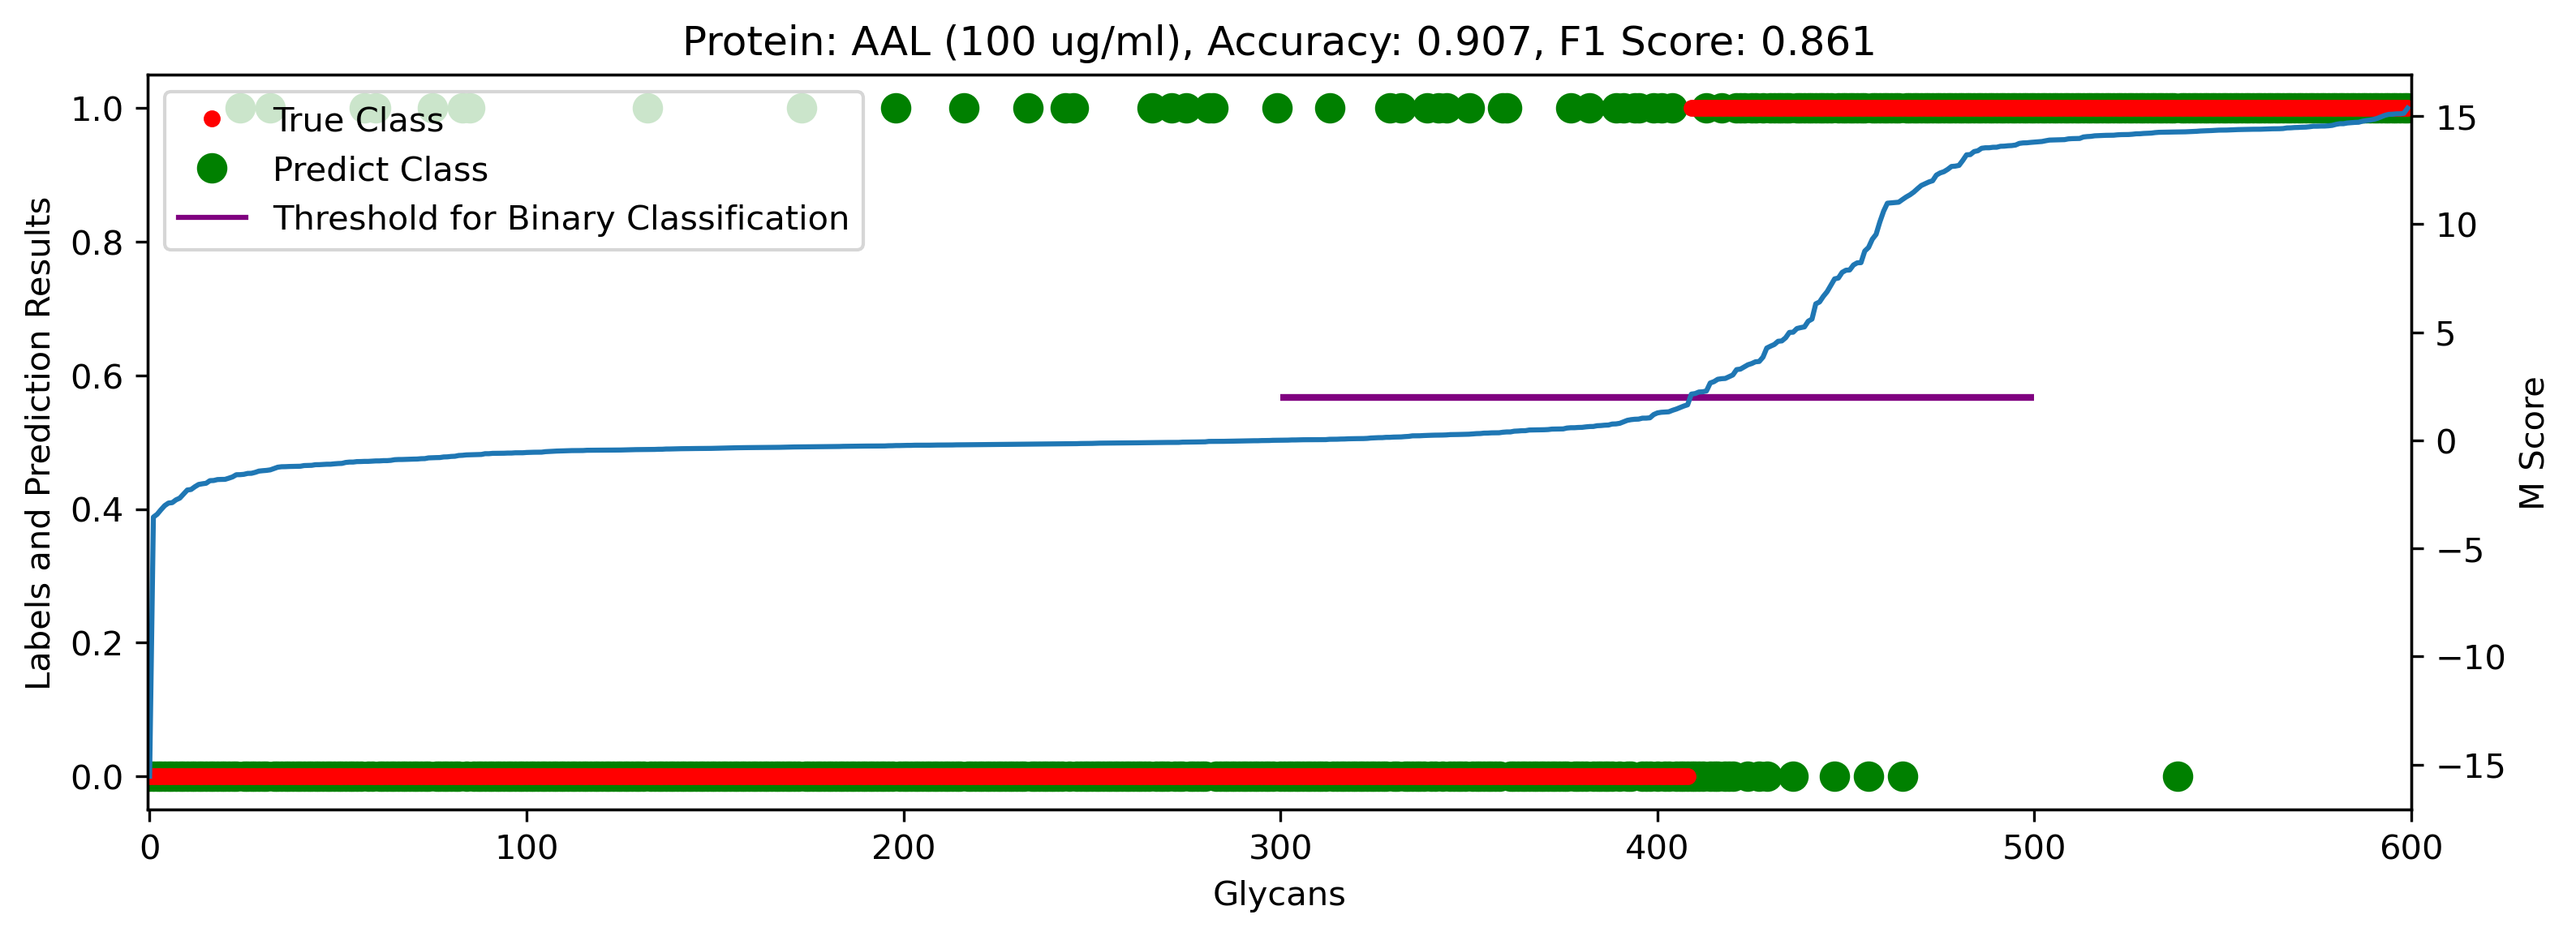

In [4]:
subject_range = range(len(y_true))
fig, ax1 = plt.subplots()
ax1.plot(subject_range, y_true, "ro", markersize=4, zorder=3, label="True Class")
ax1.plot(subject_range, y_pred, "go", markersize=8, zorder=2, label="Predict Class")
ax1.set_xlim([-0.5, len(y_true)])
ax1.set_xlabel("Glycans")
ax1.set_ylabel("Labels and Prediction Results")

ax2 = ax1.twinx()
ax2.plot(subject_range, mscore_value, label="M Score")
ax2.set_ylabel("M Score")
ax2.hlines(y=2.0, xmin=300, xmax=500, colors='purple', linestyles='-', lw=2, label='Threshold for Binary Classification')
# ax2.legend(loc="upper left")
# To combine two legend together
ax1.plot(np.nan, color='purple', label='Threshold for Binary Classification')
ax1.legend(loc="upper left")
plt.title('Protein: {}, Accuracy: {}, F1 Score: {}'.format(target_protein, round(accuracy_score(y_true, y_pred), 3), round(f1_score(y_true, y_pred), 3)))
plt.show()